Demo to Gega Darakhvelidze

In [13]:
import pandas as pd

df = pd.read_csv('dbscan.csv')
df.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"


first check core point (neighbor > minpoint)
iterate list
and expand the cluster

In [21]:
MINPTS = 3
# Initialize cluster id and visited flag.
# 0: not assigned , -1: noise
df["cluster"] = 0
df["visited"] = False

cluster_id = 0
core_points = []  

def parse_neighbors(neighbor_str):
    if pd.isnull(neighbor_str) or neighbor_str.strip() == "":
        return []
    return list(map(int, neighbor_str.split(',')))

def expand_cluster(point_id, neighbor_ids, current_cluster):

    df.loc[df["pt"] == point_id, "cluster"] = current_cluster

    seed_set = list(neighbor_ids)
    
    
    while seed_set:
        current_pt = seed_set.pop(0)
        current_row = df[df["pt"] == current_pt].iloc[0]
    
        if not current_row["visited"]:
            df.loc[df["pt"] == current_pt, "visited"] = True
            current_neighbors = parse_neighbors(current_row["neighbors"])
            seed_set.extend(current_neighbors)
    
        if df.loc[df["pt"] == current_pt, "cluster"].iloc[0] in [0, -1]:
            df.loc[df["pt"] == current_pt, "cluster"] = current_cluster


for index, row in df.iterrows():
    pt = row['pt']
    neighbors = parse_neighbors(row['neighbors'])
    if len(neighbors) >= MINPTS:
        core_points.append(pt)
    else: 
        df.loc[df['pt'] == pt, "cluster"] = -1
        # df.loc[df['pt'] == pt, "visited"] = True
        
for pt in core_points:
    if not df.loc[df['pt'] == pt, "visited"].iloc[0]:
        df.loc[df['pt'] == pt, "visited"] = True
        cluster_id += 1
        
        neighbors = parse_neighbors(df.loc[df['pt'] == pt, "neighbors"].iloc[0])
        expand_cluster(pt, neighbors, cluster_id)
        
print(df[["pt", "cluster"]])


    pt  cluster
0    0       -1
1    1        1
2    2       -1
3    3       -1
4    4        1
..  ..      ...
75  75        1
76  76        2
77  77       -1
78  78        3
79  79       -1

[80 rows x 2 columns]


In [22]:
df['cluster'].value_counts()

cluster
 2    43
-1    26
 1     8
 3     3
Name: count, dtype: int64

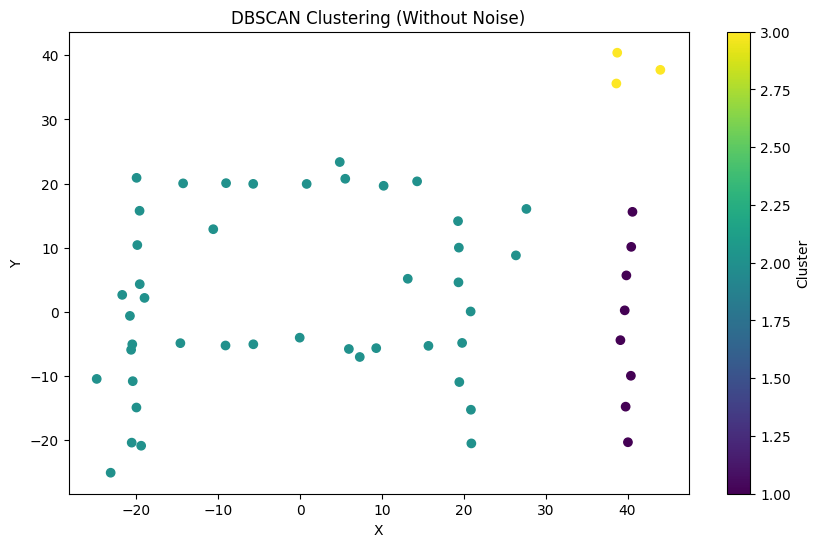

In [23]:
import matplotlib.pyplot as plt

# Filter out noise points
filtered_df = df[df['cluster'] != -1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['cluster'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering (Without Noise)')
plt.show()